In [55]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import xlrd
import time

In [53]:
df_full = pd.read_csv('../../Data/yellow_tripdata_2009-01.csv')

In [ ]:
map = gpd.read_file('../../Data/NYC_Geo_prayer.json')

In [74]:
df2=df_full.head(1000000)

In [68]:
df2

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,VTS,2009-01-01 14:36:00,2009-01-01 14:49:00,3,7.25,-73.776665,40.645307,NaN,NaN,-73.699002,40.662175,CASH,18.1,0.0,NaN,0.00,0.0,18.10
99996,VTS,2009-01-01 14:52:00,2009-01-01 15:00:00,1,1.43,-73.998485,40.726890,NaN,NaN,-73.997737,40.741945,CASH,6.5,0.0,NaN,0.00,0.0,6.50
99997,VTS,2009-01-17 06:04:00,2009-01-17 06:06:00,1,0.54,-73.967365,40.803345,NaN,NaN,-73.959458,40.799408,CASH,3.7,0.0,NaN,0.00,0.0,3.70
99998,VTS,2009-01-16 18:10:00,2009-01-16 18:19:00,1,1.15,-73.998947,40.734368,NaN,NaN,-73.985993,40.742522,CASH,6.5,1.0,NaN,0.00,0.0,7.50


In [39]:
print(map.crs)

epsg:4326


<AxesSubplot:>

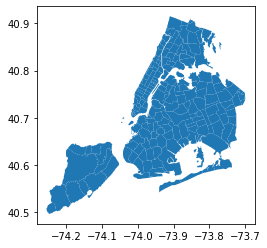

In [40]:
map.plot()

In [41]:
type(map)

geopandas.geodataframe.GeoDataFrame

In [12]:
print(df.shape)

(10000, 18)


In [63]:
df

,Trip_Distance,Fare_Amt,geometry
0,2.63,8.9,POINT (-73.99196 40.72157)
1,4.55,12.1,POINT (-73.98210 40.73629)
2,10.35,23.7,POINT (-74.00259 40.73975)
3,5.00,14.9,POINT (-73.97427 40.79095)
4,0.40,3.7,POINT (-74.00158 40.71938)
...,...,...,...
9995,1.10,5.3,POINT (-73.99717 40.73743)
9996,2.64,10.1,POINT (-73.96221 40.77912)
9997,9.06,24.1,POINT (-73.87302 40.77405)
9998,3.02,11.3,POINT (-73.98495 40.75665)


In [75]:
start_time = time.time()

df2['geometry'] = df2.apply(lambda x: Point((float(x.Start_Lon), 
                                             float(x.Start_Lat))), 
                                             axis=1)
df2.head(3)

print("--- %s seconds ---" % (time.time() - start_time))

--- 164.54618978500366 seconds ---


C:\Users\Bro Bro\.conda\envs\geospatial\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [76]:
df2=df2[['Trip_Distance','Fare_Amt','geometry']]

In [45]:
map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [87]:
d2f=gpd.GeoDataFrame(df2,
                     crs=map.crs,
                     geometry=df['geometry'])

In [94]:
df2

,Trip_Distance,Fare_Amt,geometry
0,2.63,8.9,POINT (-73.99196 40.72157)
1,4.55,12.1,POINT (-73.98210 40.73629)
2,10.35,23.7,POINT (-74.00259 40.73975)
3,5.00,14.9,POINT (-73.97427 40.79095)
4,0.40,3.7,POINT (-74.00158 40.71938)
...,...,...,...
999995,0.60,5.5,None
999996,0.80,5.9,None
999997,4.70,12.9,None
999998,1.50,9.3,None


In [49]:
map

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,@id,longitude,latitude,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,"POLYGON ((-73.86942 40.74916, -73.89143 40.746..."
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,"POLYGON ((-73.71133 40.74947, -73.71068 40.750..."
2,3,11040,New Hyde Park,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.703443,40.748714,"POLYGON ((-73.70098 40.73890, -73.70309 40.744..."
3,4,11426,Bellerose,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.724004,40.736534,"POLYGON ((-73.72270 40.75373, -73.72251 40.753..."
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.794626,40.739903,"POLYGON ((-73.81089 40.72717, -73.81116 40.728..."
...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,10065,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.962753,40.764539,"POLYGON ((-73.95232 40.76454, -73.95442 40.762..."
258,259,10075,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.955329,40.773149,"POLYGON ((-73.94908 40.76828, -73.95052 40.768..."
259,260,10069,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.989544,40.776593,"POLYGON ((-73.98821 40.78123, -73.98675 40.780..."
260,261,10281,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-74.015293,40.712377,"POLYGON ((-74.01468 40.70980, -74.01638 40.710..."


In [81]:
start_time = time.time()

please_god_work = gpd.sjoin(df2, map, op = 'within')

print("--- %s seconds ---" % (time.time() - start_time))

ValueError: 'left_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>

In [78]:
please_god_work

,Trip_Distance,Fare_Amt,geometry,index_right,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,@id,longitude,latitude
0,2.63,8.9,POINT (-73.99196 40.72157),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
54,1.90,7.8,POINT (-73.98855 40.72156),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
240,1.20,6.5,POINT (-73.99101 40.71946),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
311,2.50,9.3,POINT (-73.98899 40.71681),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
357,1.60,7.8,POINT (-73.98884 40.72226),123,124,10002,New York,NY,Manhattan,36,061,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.985688,40.716161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,4.34,12.9,POINT (-74.00878 40.70826),247,248,10045,New York,NY,Manhattan,36,061,1,http://nyc.pediacities.com/Resource/PostalCode...,-74.008683,40.708387
9196,2.71,11.3,POINT (-73.96037 40.58149),183,184,11235,Brooklyn,NY,Brooklyn,36,047,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.945881,40.584101
9201,9.49,26.1,POINT (-73.91798 40.88082),42,43,10463,Bronx,NY,Bronx,36,005,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.907704,40.881845
9513,0.79,4.1,POINT (-73.95485 40.68822),25,26,11216,Brooklyn,NY,Brooklyn,36,047,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.949316,40.680628
